In [1]:
import math
import numpy as np
#Data Analysis
import pandas as pd
from pandas import date_range
#Visulization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
 
# Machine Learning Library
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor


from pyearth import Earth
from sklearn.linear_model import ElasticNet, Lasso, Ridge


from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import RegressorChain

### Loading the Data

In [2]:
stores_dataframe= pd.read_csv('stores.csv', header= 0)
trans_dataframe= pd.read_csv('transactions.csv', header= 0)
train_dataframe= pd.read_csv('train.csv', header=0)
test_dataframe= pd.read_csv('test.csv', header= 0)
holiday_dataframe= pd.read_csv('holidays_events.csv', header= 0)
oil_dataframe= pd.read_csv('oil.csv', header= 0)


In [26]:
holiday_dataframe.shape

(350, 6)

### Let's see the basic information about all the Dataframe

In [15]:
holiday_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [16]:
trans_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [17]:
oil_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [18]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 137.4+ MB


In [19]:
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


In [20]:
stores_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


### 
    Each Dataframe contains date feature except stores_dataframe, the Dtype of date is object so first thing we need to do is convert Dtpe of date of all dataframe into datetime

In [22]:
holiday_dataframe['date'] = pd.to_datetime(holiday_dataframe['date'], format = "%Y-%m-%d")
oil_dataframe['date'] = pd.to_datetime(oil_dataframe['date'], format = "%Y-%m-%d")
trans_dataframe['date'] = pd.to_datetime(trans_dataframe['date'], format = "%Y-%m-%d")
train_dataframe['date'] = pd.to_datetime(train_dataframe['date'], format = "%Y-%m-%d")
test_dataframe['date'] = pd.to_datetime(test_dataframe['date'], format = "%Y-%m-%d")

### Explorations & Visualizations
#### Holiday Dataframe

In [105]:
holiday_dataframe.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [92]:
def plot_data(dataframe, col, ax, color, angle):
    count_classes= dataframe[col].value_counts()
    ax= sns.barplot(x= count_classes.index, y= count_classes, ax= ax, palette= color)
    ax.set_title(col.upper(), fontsize=20)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

<Figure size 720x504 with 0 Axes>

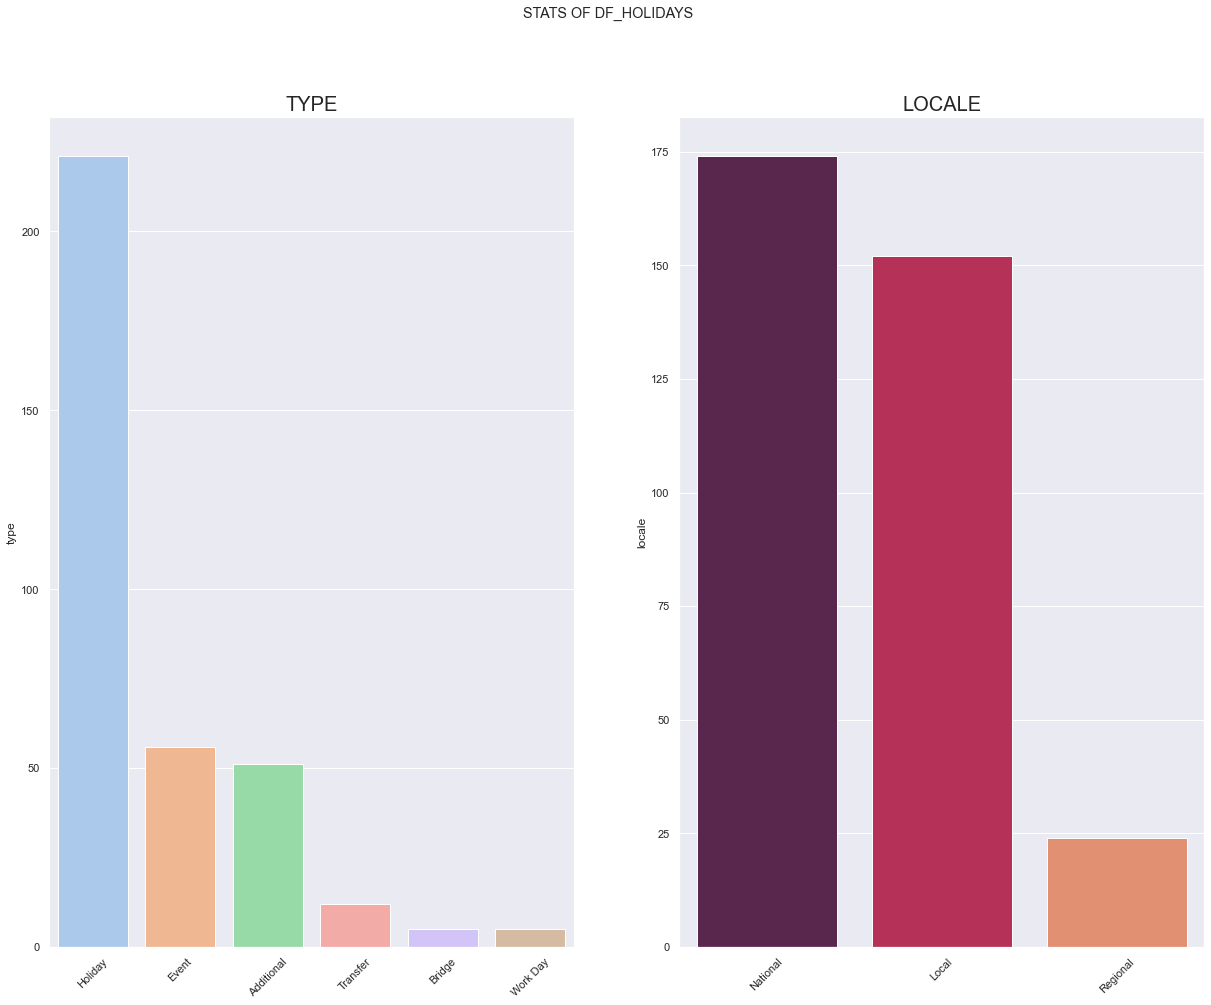

In [104]:
plt.figure(figsize= (10,7))
fig, axes= plt.subplots(nrows=1, ncols= 2,)
fig.suptitle("Stats of df_holidays".upper())
plot_data(holiday_dataframe, "type", axes[0], "pastel", 45)
plot_data(holiday_dataframe, "locale", axes[1], "rocket", 45)
plt.show()

#### Stores Dataframe

In [107]:
stores_dataframe.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


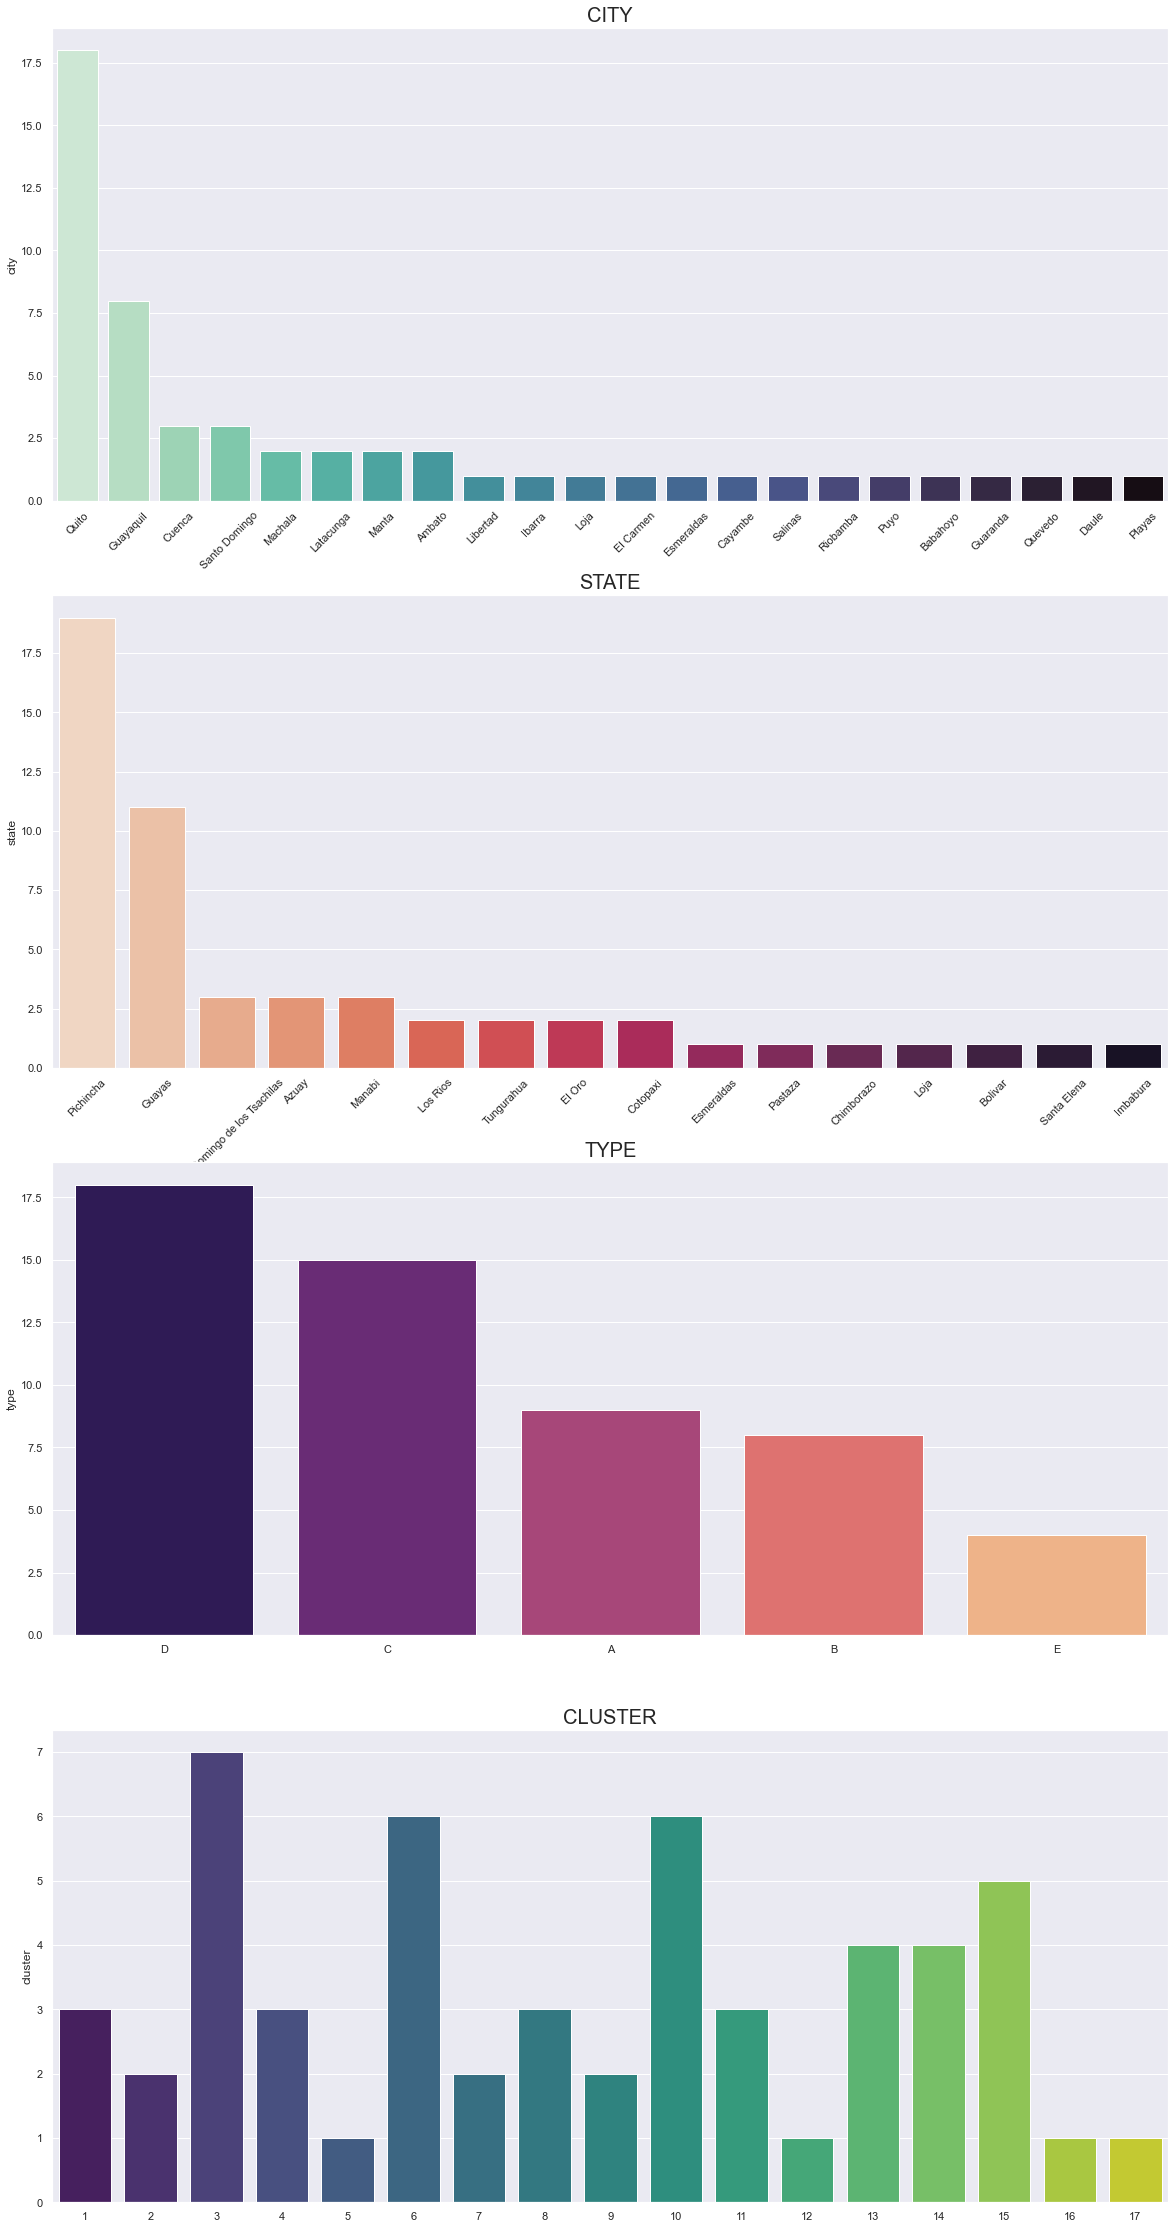

In [106]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,40))
plot_data(stores_dataframe, "city", axes[0], "mako_r", 45)
plot_data(stores_dataframe, "state", axes[1], "rocket_r", 45)
plot_data(stores_dataframe, "type", axes[2], "magma", 0)
plot_data(stores_dataframe, "cluster", axes[3], "viridis", 0)
plt.show()

#### train_dataframe:
    Plotting pie chart for family

In [109]:
# Equally distributed data
train_dataframe['family'].value_counts()

PRODUCE                       90936
CELEBRATION                   90936
DAIRY                         90936
SEAFOOD                       90936
SCHOOL AND OFFICE SUPPLIES    90936
CLEANING                      90936
HOME AND KITCHEN I            90936
BABY CARE                     90936
LAWN AND GARDEN               90936
DELI                          90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
PREPARED FOODS                90936
LADIESWEAR                    90936
FROZEN FOODS                  90936
PET SUPPLIES                  90936
BREAD/BAKERY                  90936
BEVERAGES                     90936
PERSONAL CARE                 90936
GROCERY I                     90936
GROCERY II                    90936
MEATS                         90936
POULTRY                       90936
BOOKS                         90936
HARDWARE                      90936
EGGS                          90936
LIQUOR,WINE,BEER              90936
MAGAZINES                   

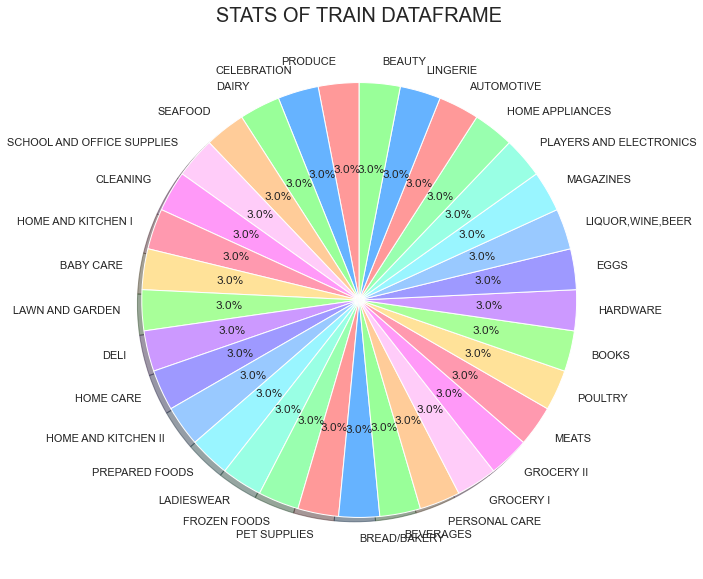

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
count_classes = train_dataframe['family'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99',
          '#ffcc99', '#ffccf9', '#ff99f8', 
          '#ff99af', '#ffe299', '#a8ff99',
          '#cc99ff', '#9e99ff', '#99c9ff',
          '#99f5ff', '#99ffe4', '#99ffaf']

plt.pie(count_classes, 
        labels = count_classes.index, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
       colors= colors)
plt.title("Stats of train dataframe".upper(), fontsize= 20)
plt.show()

#### oil_dataframe & train_dataframe:
    Box Plot

In [122]:
def boxplot(palette, x, y, hue, ax, title):
    ax = sns.boxplot(x=x, y=y, hue=hue, ax=ax)
    ax.set_title(title, fontsize=20)

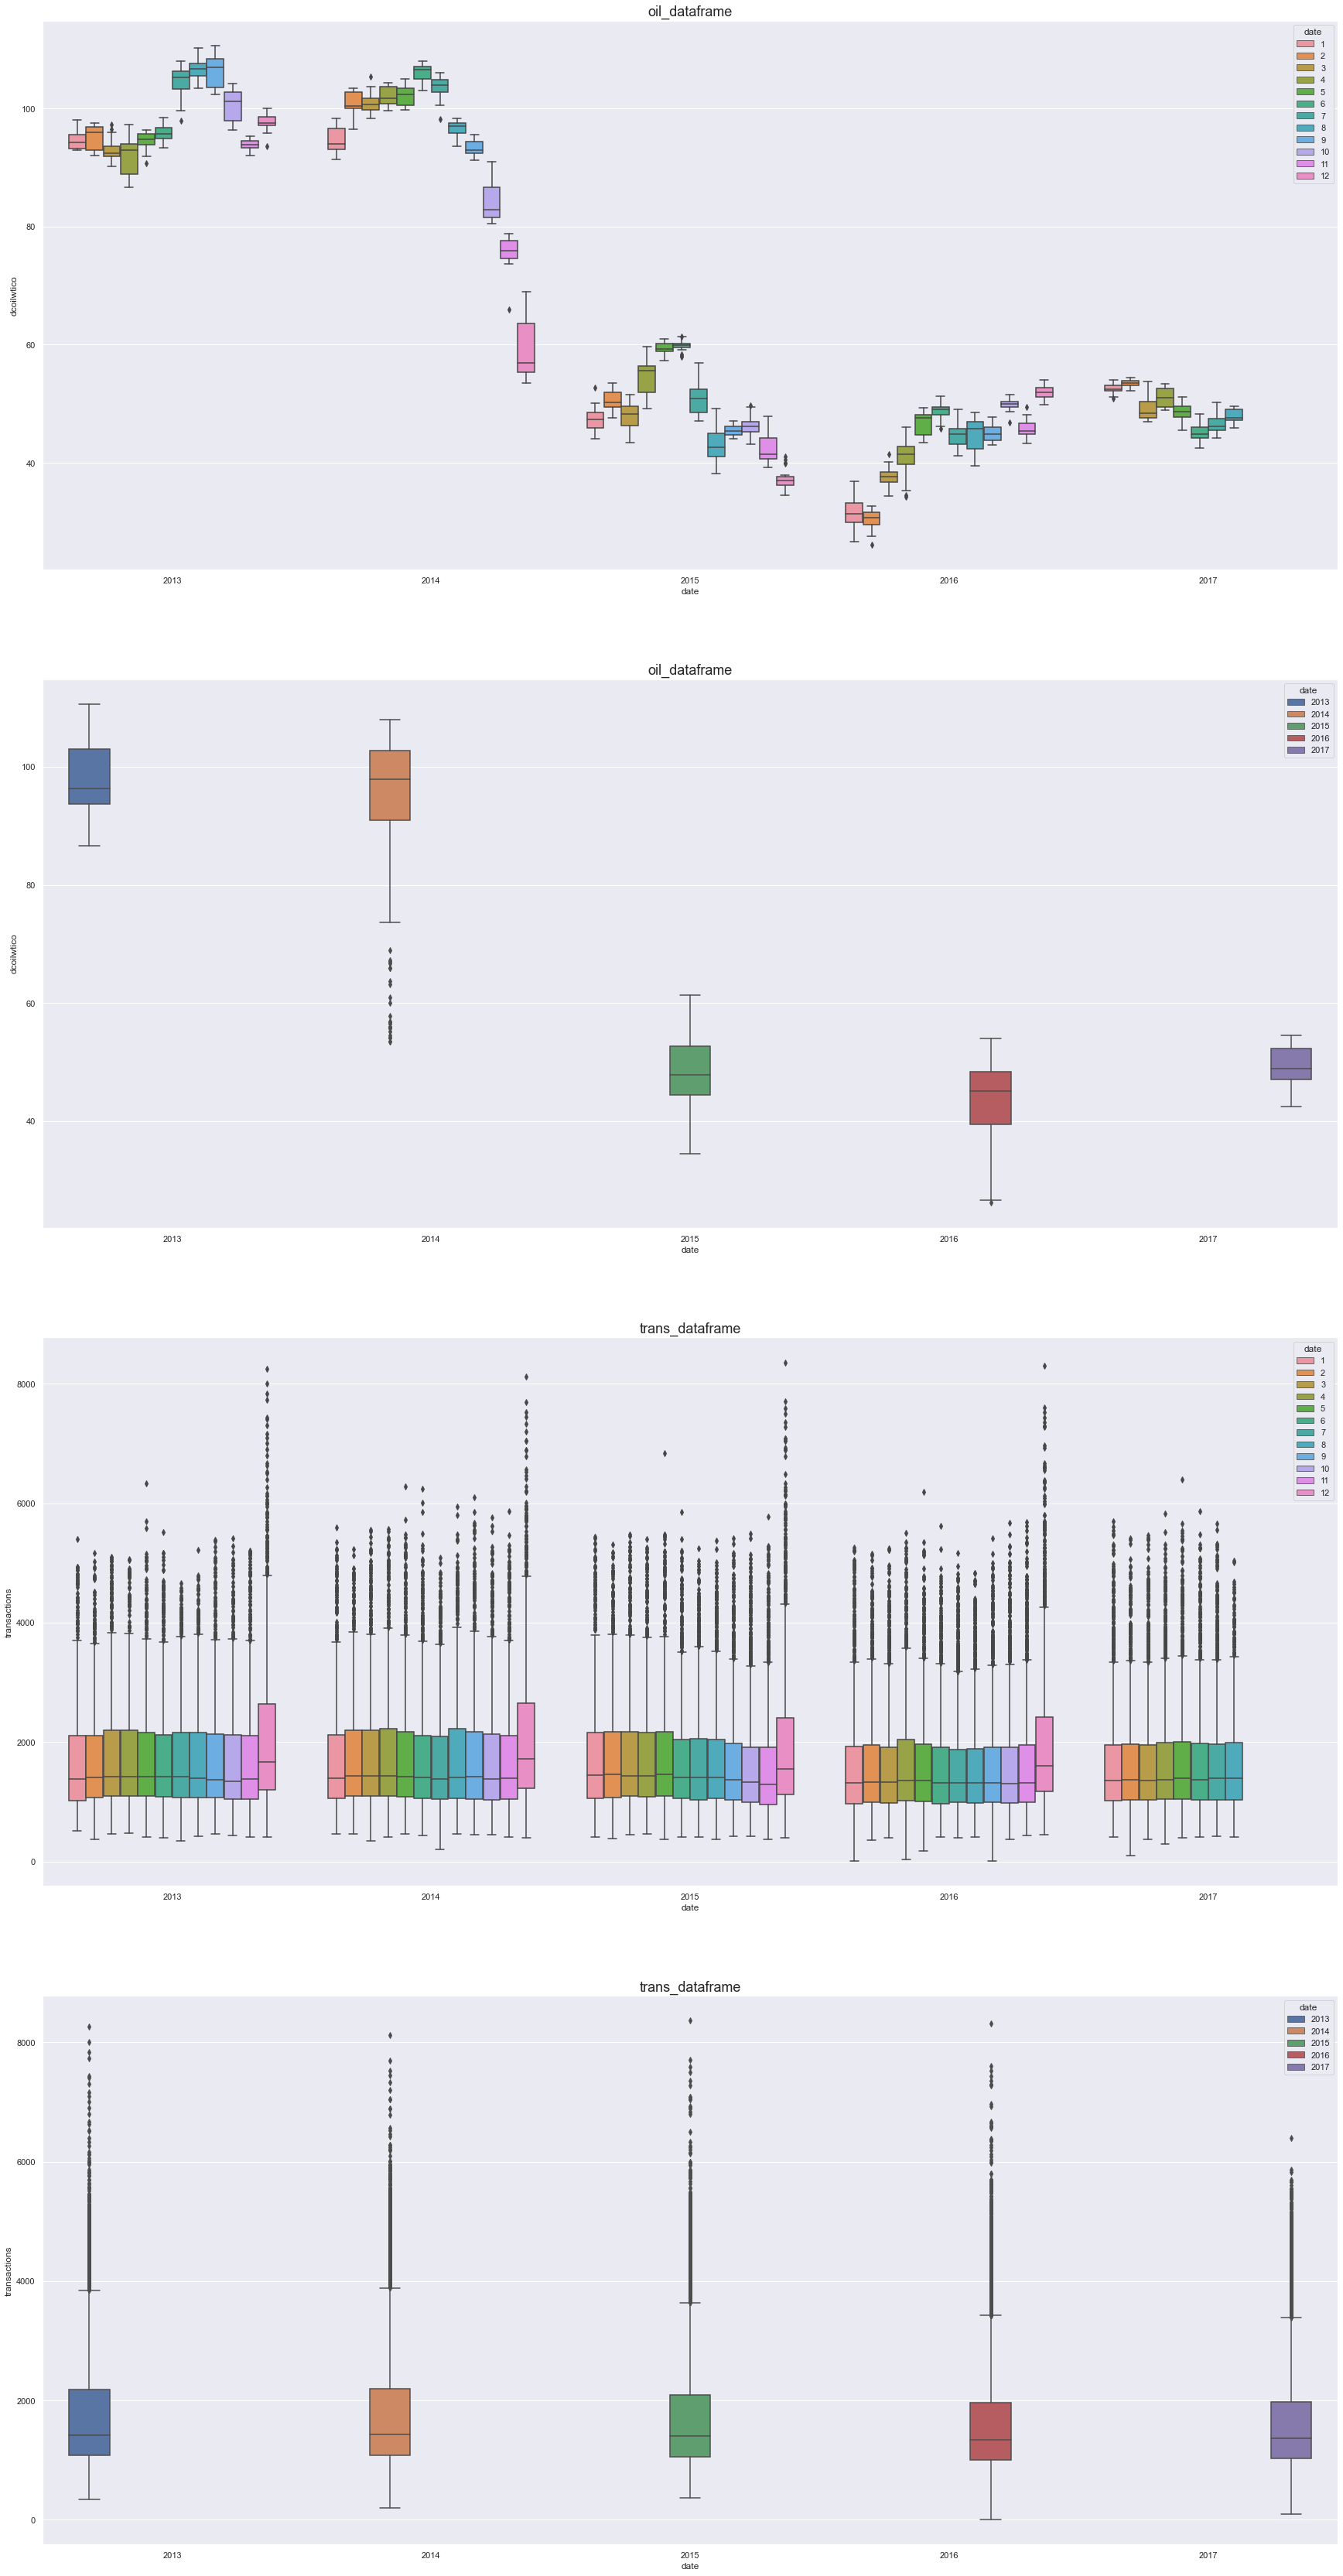

In [121]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30,60))
boxplot("pastel", oil_dataframe['date'].dt.year, oil_dataframe['dcoilwtico'], oil_dataframe['date'].dt.month, axes[0], "oil_dataframe")
boxplot("pastel", oil_dataframe['date'].dt.year, oil_dataframe['dcoilwtico'], oil_dataframe['date'].dt.year, axes[1], "oil_dataframe")
boxplot("pastel", trans_dataframe['date'].dt.year, trans_dataframe['transactions'], trans_dataframe['date'].dt.month, axes[2], "trans_dataframe")
boxplot("pastel", trans_dataframe['date'].dt.year, trans_dataframe['transactions'], trans_dataframe['date'].dt.year, axes[3], "trans_dataframe")
plt.show()

#### Trend

In [123]:
def plot_moving_average(dataframe, key, freq, col, window, min_periods, ax, title):
    grouped_df = get_group_data(dataframe, key, freq, col)
    moving_average = grouped_df['mean'].rolling(window=window, center=True, min_periods=min_periods).mean()   
    ax = grouped_df['mean'].plot(color='0.85', linestyle='dashdot', ax=ax)
    ax = moving_average.plot(linewidth=3, color='g', ax=ax)
    ax.set_title(title, fontsize=20)

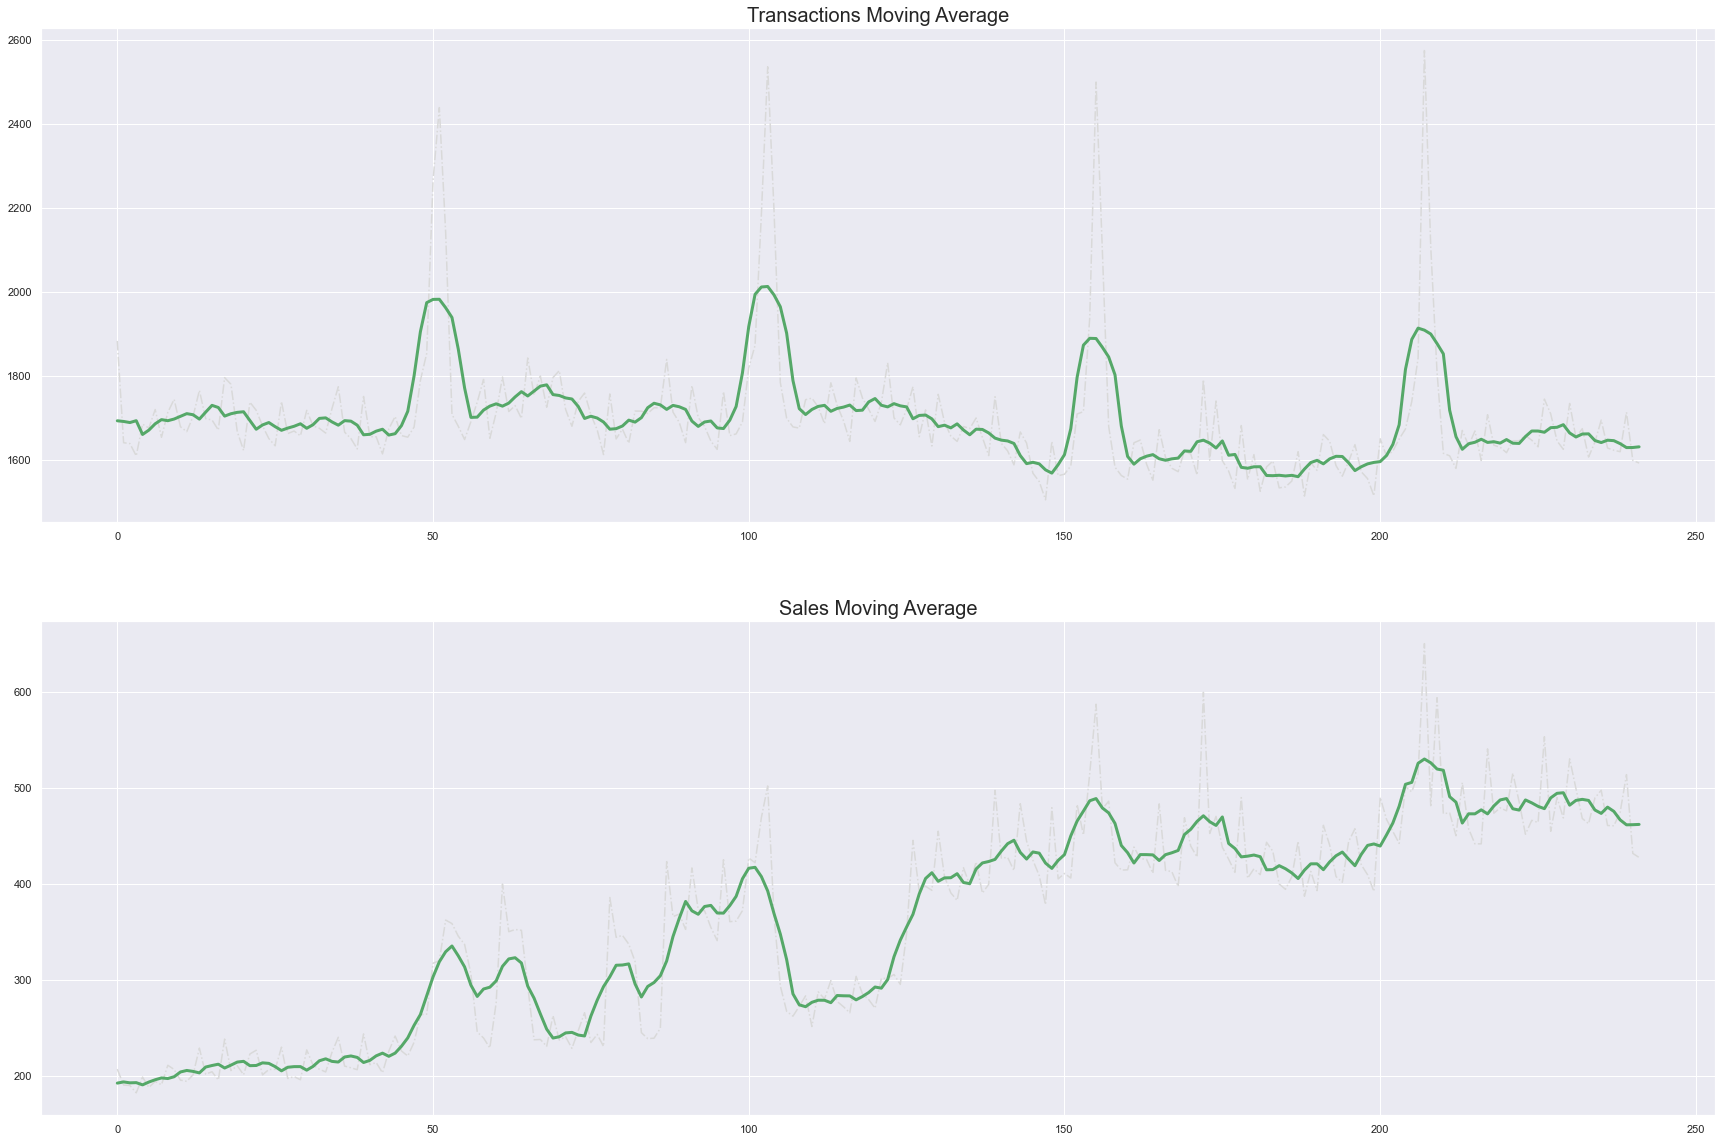

In [124]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,20))
plot_moving_average(trans_dataframe, 'date', 'W', 'transactions', 7, 4, axes[0], 'Transactions Moving Average')
plot_moving_average(train_dataframe, 'date', 'W', 'sales', 7, 4, axes[1], 'Sales Moving Average')
plt.show()

In [28]:
# Print 10 values from the bottom
oil_dataframe.tail(10)

,date,dcoilwtico
1208,2017-08-18,48.59
1209,2017-08-21,47.39
1210,2017-08-22,47.65
1211,2017-08-23,48.45
1212,2017-08-24,47.24
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


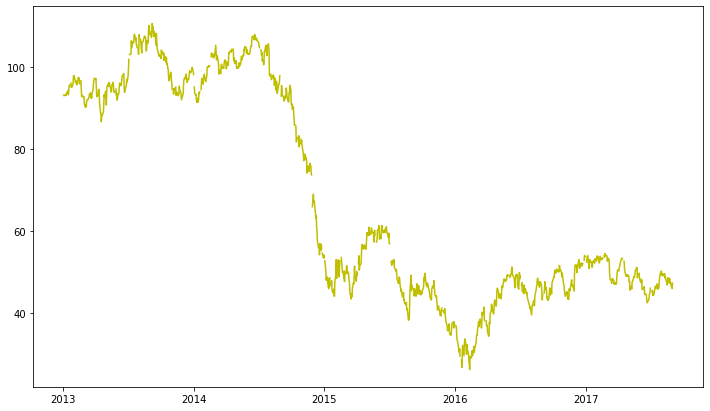

In [35]:
plt.figure(figsize= (12,7))
plt.plot(oil_dataframe['date'], oil_dataframe['dcoilwtico'], color='y',)

#### trans_dataframe

In [36]:
trans_dataframe.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [37]:
trans_dataframe.shape

(83488, 3)

### 
    As wee can see that trans_dataframe have more than 83k observations(rows), so for easy analysis we can group the data by month or week. 
    now, let's do it

In [38]:
def get_group_data(dataframe, key, freq, col):
    grouped_df=dataframe.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean= (col, 'mean'))
    grouped_df= grouped_df.reset_index()
    return grouped_df

In [43]:
# Calling the get_group_data
get_group_by_week=get_group_data(trans_dataframe, 'date', 'W', 'transactions')
get_group_by_week.head()

,date,mean
0,2013-01-06,1883.203463
1,2013-01-13,1641.090062
2,2013-01-20,1639.024845
3,2013-01-27,1609.816770
4,2013-02-03,1685.263975


In [45]:
train_dataframe.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [46]:
test_dataframe.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


### 
    Let's add column time to new created get_group_by_week dataframe.

In [44]:
def time(dataframe, key, freq, col):
    grouped_df= get_group_data(dataframe, key, freq, col)
    grouped_df['time']= np.arange(len(grouped_df.index))
    column_time= grouped_df.pop('time')
    grouped_df.insert(1, 'time', column_time)
    return grouped_df
    

In [47]:
grouped_df_train_week= time(train_dataframe, 'date', 'W', 'sales')
grouped_df_train_month= time(train_dataframe, 'date', 'M', 'sales')
grouped_df_train_month.head()

,date,time,mean
0,2013-01-31,0,186.952405
1,2013-02-28,1,193.581846
2,2013-03-31,2,206.880581
3,2013-04-30,3,205.639071
4,2013-05-31,4,209.943594


#### Regression plot(linear regression)

<Figure size 1080x720 with 0 Axes>

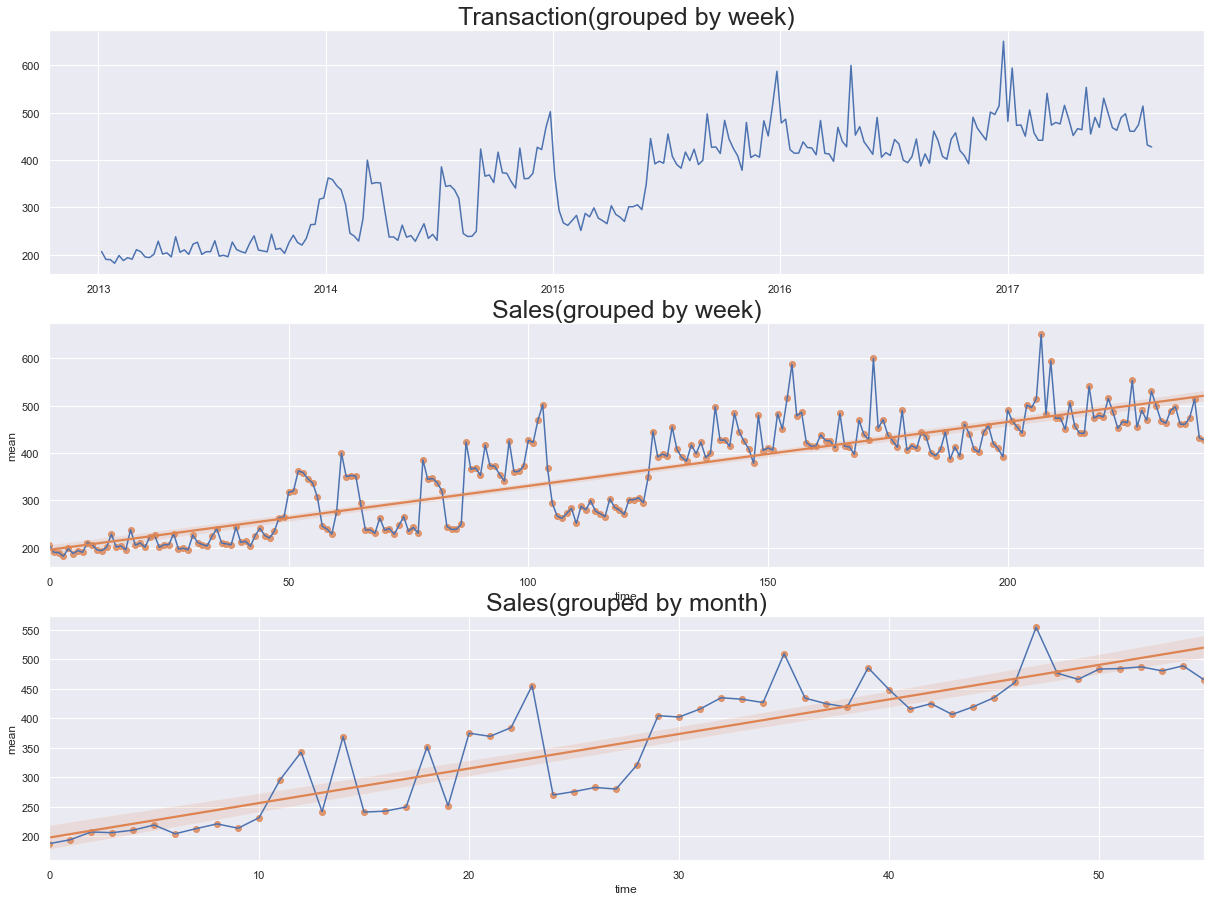

In [84]:
plt.figure(figsize=(15,10))
fig, axes= plt.subplots(nrows=3, ncols=1, )

axes[0].plot('date', 'mean',data= grouped_df_train_week,)
axes[0].set_title('Transaction(grouped by week)', fontsize=25)

axes[1].plot('time', 'mean', data= grouped_df_train_week)
axes[1].set_title('Sales(grouped by week)', fontsize= 25)
axes[1]= sns.regplot(x= 'time', y='mean', data= grouped_df_train_week, ax= axes[1])

axes[2].plot('time', 'mean', data= grouped_df_train_month)
axes[2].set_title('Sales(grouped by month)', fontsize=25)
axes[1]= sns.regplot(x='time', y= 'mean', data= grouped_df_train_month,)

### Adding lag Feature:

In [85]:
def add_lag(dataframe, key, freq, col, lag):
    grouped_df= get_group_data(dataframe, key, freq, col)
    name= 'Lag_' + str(lag)
    grouped_df['Lag']= grouped_df['mean'].shift(lag)
    return grouped_df

In [87]:
df_grouped_train_w_lag1 = add_lag(train_dataframe, 'date', 'W', 'sales', 1)
df_grouped_train_m_lag1 = add_lag(train_dataframe, 'date', 'W', 'sales', 1)

df_grouped_train_w_lag1.head()

,date,mean,Lag
0,2013-01-06,206.843478,NaN
1,2013-01-13,190.285220,206.843478
2,2013-01-20,189.835452,190.285220
3,2013-01-27,182.152050,189.835452
4,2013-02-03,198.564267,182.152050


#### Let's plot previous plot with lag feature

<Figure size 1080x720 with 0 Axes>

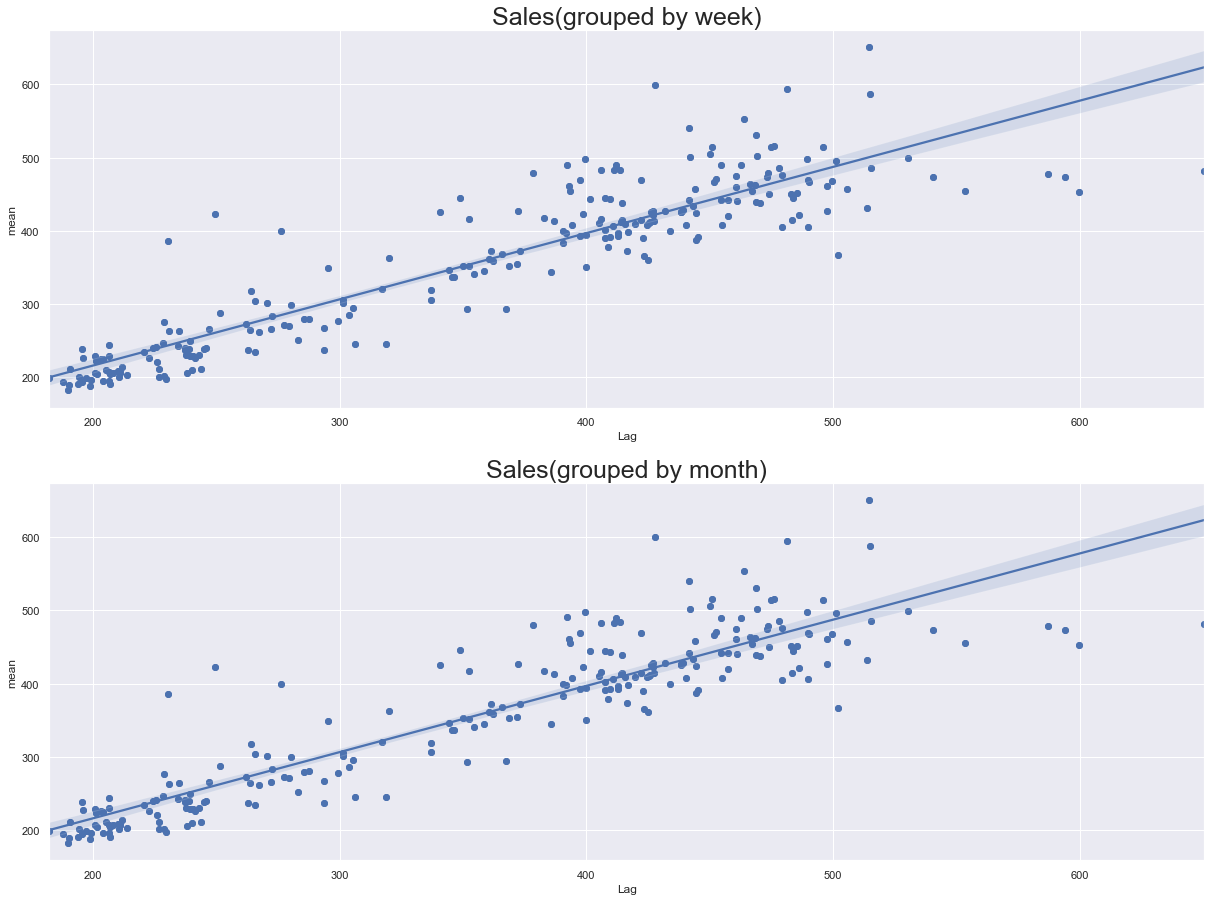

In [91]:
plt.figure(figsize=(15,10))
fig, axes= plt.subplots(nrows=2, ncols=1, )

axes[0].scatter('Lag', 'mean', data= df_grouped_train_w_lag1)
axes[0].set_title('Sales(grouped by week)', fontsize= 25)
axes[0]= sns.regplot(x= 'Lag', y='mean', data= df_grouped_train_w_lag1, ax= axes[0])

axes[1].scatter('Lag', 'mean', data= df_grouped_train_m_lag1)
axes[1].set_title('Sales(grouped by month)', fontsize=25)
axes[1]= sns.regplot(x='Lag', y= 'mean', data= df_grouped_train_m_lag1,)

#### Forecasting Trend

In [127]:
def plot_deterministic_process(dataframe, key, freq, col, ax1, title1, ax2, title2):
    grouped_df= get_group_data(dataframe, key, freq, col)
    grouped_df['date']= pd.to_datetime(grouped_df['date'], format= "%Y-%m-%d")
    dp=DeterministicProcess(index= grouped_df['date'], constant= True, order= 1, drop= True)
    dp.index.freq= freq
    X1= dp.in_sample()
    y1= grouped_df['mean']
    y1.index= X1.index
    
    model= LinearRegression(fit_intercept= False)
    model.fit(X1, y1)
    
    y1_pred= pd.Series(model.predict(X1), index= X1.index)
    ax1 = y1.plot(linestyle='dashed', label="mean", color="0.75", ax=ax1, use_index=True)
    ax1 = y1_pred.plot(linewidth=3, label="Trend", color='b', ax=ax1, use_index=True)
    ax1.set_title(title1, fontsize=18)  
    _ = ax1.legend()
    
    steps = 30 
    X2 = dp.out_of_sample(steps=steps)
    y2_fore = pd.Series(model.predict(X2), index=X2.index)
    y2_fore.head()
    ax2 = y1.plot(linestyle='dashed', label="mean", color="0.75", ax=ax2, use_index=True)
    ax2 = y1_pred.plot(linewidth=3, label="Trend", color='b', ax=ax2, use_index=True)
    ax2 = y2_fore.plot(linewidth=3, label="Predicted Trend", color='r', ax=ax2, use_index=True)
    ax2.set_title(title2, fontsize=18)  
    _ = ax2.legend()

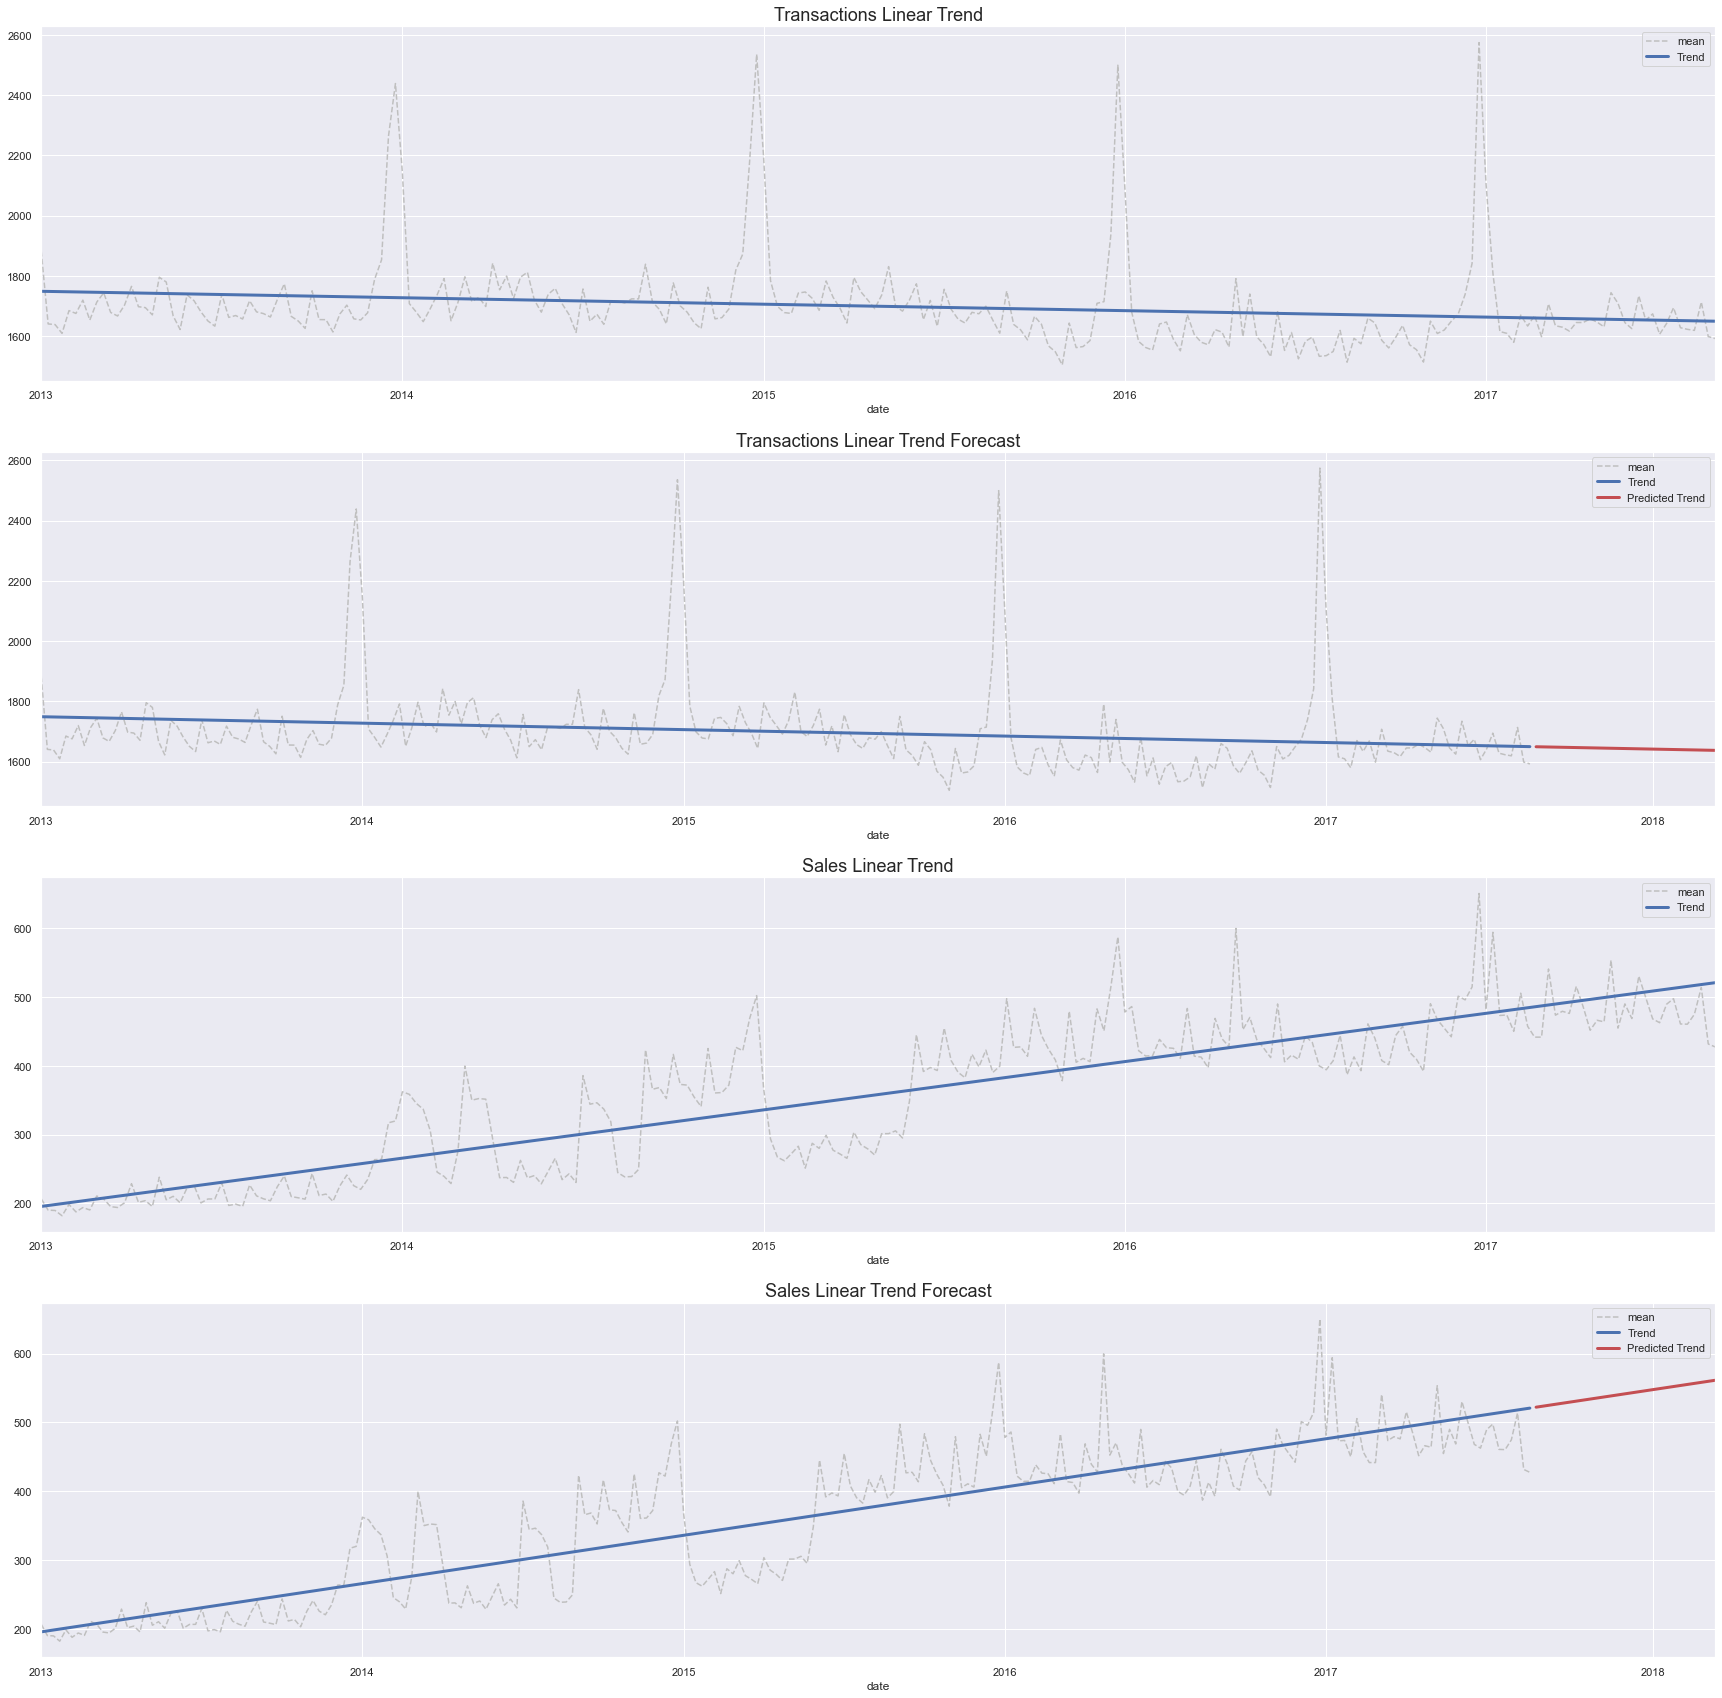

In [128]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30,30))
plot_deterministic_process(trans_dataframe, 'date', 'W', 'transactions', 
                           axes[0], "Transactions Linear Trend",  
                           axes[1], "Transactions Linear Trend Forecast")
plot_deterministic_process(train_dataframe, 'date', 'W', 'sales', 
                           axes[2], "Sales Linear Trend", 
                           axes[3], "Sales Linear Trend Forecast")
plt.show()

### Seasonality:
    Time series exhibits seasonality whenever there is a regular, periodic change in the mean of the series. Seasonal changes generally follow the clock and calendar -- repetitions over a day, a week, or a year are common. Seasonality is often driven by the cycles of the natural world over days and years or by conventions of social behavior surrounding dates and times. Just like we used a moving average plot to discover the trend in a series, we can use a seasonal plot to discover seasonal patterns.

### Machine Learning Forecasting

In [135]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)

In [136]:
# train data
store_sales = train_dataframe.copy()
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()

family_sales = (
    store_sales
    .groupby(['family', 'date'])
    .mean()
    .unstack('family')
    .loc['2017']
)

In [137]:
# test data
test = test_dataframe.copy()
test['date'] = test.date.dt.to_period('D')
test = test.set_index(['store_nbr', 'family', 'date']).sort_index()


In [138]:
def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)


In [139]:
y = family_sales.loc[:, 'sales']

# make 4 lag features
X = make_lags(y, lags=5).dropna()

# make multistep target
y = make_multistep_target(y, steps=16).dropna()

y, X = y.align(X, join='inner', axis=0)


In [140]:
le = LabelEncoder()
X = (X
    .stack('family')  # wide to long
    .reset_index('family')  # convert index to column
    .assign(family=lambda x: le.fit_transform(x.family))  # label encode
)
y = y.stack('family')  # wide to long

display(y) 

y_step_1     y_step_2     y_step_3  \
date       family                                                              
2017-01-06 AUTOMOTIVE                     6.018519    10.259259     9.388889   
           BABY CARE                      0.277778     0.259259     0.240741   
           BEAUTY                         6.518519    10.037037    11.611111   
           BEVERAGES                   3507.277778  4848.518519  5503.648148   
           BOOKS                          0.537037     0.481481     0.722222   
...                                            ...          ...          ...   
2017-07-31 POULTRY                      364.955648   403.601334   377.313980   
           PREPARED FOODS                84.698648    87.836796    88.735963   
           PRODUCE                     2257.140589  2609.180150  3122.895724   
           SCHOOL AND OFFICE SUPPLIES    30.111111    49.333333    57.481481   
           SEAFOOD                       20.488333    20.346852    20.801037   

                                          y_step_4     y_step_5     y_step_6  \
date       family                                                              
2017-01-06 AUTOMOTIVE                     5.944444     4.777778     6.314815   
           BABY CARE                      0.444444     0.240741     0.277778   
           BEAUTY                         5.648148     6.500000     5.277778   
           BEVERAGES                   3448.203704  3171.740741  3046.870370   
           BOOKS                          0.500000     0.518519     0.481481   
...                                            ...          ...          ...   
2017-07-31 POULTRY                      316.436093   533.497054   416.454018   
           PREPARED FOODS                77.173000    91.886760   100.384963   
           PRODUCE                     1792.220910  2079.319469  2418.970157   
           SCHOOL AND OFFICE SUPPLIES    51.907407    63.222222    85.203704   
           SEAFOOD                       17.116296    25.553963    24.209519   

                                          y_step_7     y_step_8     y_step_9  \
date       family                                                              
2017-01-06 AUTOMOTIVE                     5.388889     5.240741     8.500000   
           BABY CARE                      0.296296     0.296296     0.388889   
           BEAUTY                         4.370370     4.703704     7.777778   
           BEVERAGES                   2693.722222  3226.037037  4667.296296   
           BOOKS                          0.388889     0.444444     0.574074   
...                                            ...          ...          ...   
2017-07-31 POULTRY                      464.596558   344.051740   313.780869   
           PREPARED FOODS               102.248148    86.627444    77.344130   
           PRODUCE                     2675.105815  2111.133423  2168.535465   
           SCHOOL AND OFFICE SUPPLIES   100.277778    64.407407    59.759259   
           SEAFOOD                       23.512852    18.419852    18.481130   

                                         y_step_10    y_step_11    y_step_12  \
date       family                                                              
2017-01-06 AUTOMOTIVE                    10.259259     6.407407     5.685185   
           BABY CARE                      0.425926     0.314815     0.166667   
           BEAUTY                         9.037037     5.648148     5.351852   
           BEVERAGES                   5580.611111  3700.370370  3409.796296   
           BOOKS                          0.555556     0.388889     0.500000   
...                                            ...          ...          ...   
2017-07-31 POULTRY                      305.270204   278.819870   468.857370   
           PREPARED FOODS                84.796537    78.791444    96.286926   
           PRODUCE                     2663.076241  1670.264889  2198.854500   
           SCHOOL AND OFFICE SUPPLIES  

###  Forecast with the DirRec strategy

In [141]:
# init model
model = RegressorChain(base_estimator=XGBRegressor())

In [142]:
model.fit(X, y)
y_pred = pd.DataFrame(model.predict(X), index=y.index,columns=y.columns).clip(0.0)

In [143]:
# helpful function
def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

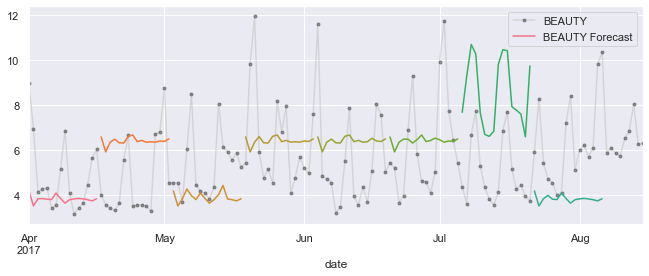

In [144]:
FAMILY = 'BEAUTY'
START = '2017-04-01'
EVERY = 16

y_pred_ = y_pred.xs(FAMILY, level='family', axis=0).loc[START:]
y_ = family_sales.loc[START:, 'sales'].loc[:, FAMILY]

fig, ax = plt.subplots(1, 1, figsize=(11, 4))
ax = y_.plot(color="0.75",style=".-",markeredgecolor="0.25", markerfacecolor="0.25",ax=ax, alpha=0.5)
ax = plot_multistep(y_pred_, ax=ax, every=EVERY)
_ = ax.legend([FAMILY, FAMILY + ' Forecast'])